# 2.3: Nonlinear parameter estimation: Iterative Earthquake location#

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

In this practical, we will look at a nonlinear inverse problem that requires an iterative solution. 

As an example, we will consider is earthquake location.

Specifically, the practical is to write a python script to iteratively update an earthquake location for the $(x,y,z)$ and origin time, $t$.  Use a homogeneous crustal Earth model with wave speed, v=5.4 km/s. The tasks to be performed are:

1. Read in 10 seismic stations at locations on a +-30km box in (x,y) at the earth’s surface together with two sets of arrival times from the source to each station, one with noise added and one without.

2. Choose a random starting guess inside the box and determine expressions for each entry of the 10 x 4 Derivative matrix and build the G matrix. Build the data covariance matrix for independent Gaussian errors with $\sigma=0.2$

3. Apply the least squares iterative solution to both the noisy and noiseless data sets. Decide how many iterations to let it run for.

4. Make a plot showing the source location at each iteration for each case.

5. Make a table of the residuals vs iteration for each case.

6. Calculate and plot the model covariance matrices for each pair of parameters at your final solution.

Things to consider. Does the iterative algorithm converge to a good enough solution? Does this solution fit teh data adequately? How many iterations does it take? What happens if you put the starting solution far from the actual earthquake location? 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from anu_inversion_course import plotcovellipse as pc
import pickle

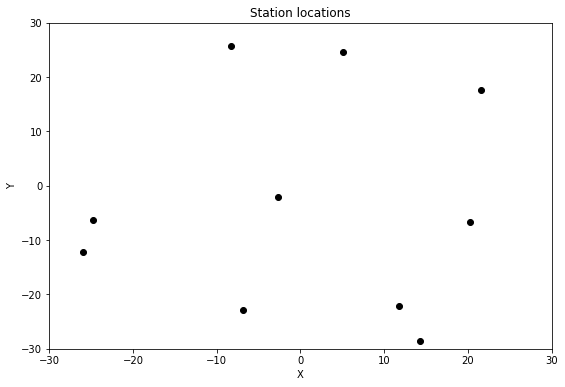

 tobs
 [ 9.31979913 10.67036112  7.91562913 11.80824099 11.13594735  9.50326285
 10.56990629 12.26874052  9.99586708  8.01971903]
 tobsn
 [ 9.14788778 10.69212619  7.90166076 11.8822169  11.07486658  9.60494135
 10.17896718 12.28384527 10.04709788  8.04154611]


In [2]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Read in 10 seismic stations at random locations on a +-30km box in (x,y) at the earth’s surface together 
# with two sets of arrival times from the source to each station, one with noise added and one without.

pickle_off = open("Datasets/eqdata.pickle","rb")
[tobs,tobsn,sta] = pickle.load(pickle_off)

fig, ax = plt.subplots(figsize=(9,6))
plt.title('Station locations')
ax.scatter(sta.T[0],sta.T[1],color='k')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(' tobs\n',tobs)
print(' tobsn\n',tobsn)

**Task 1** First write a python function to calculate the arrival times of seismic phases at all stations.

In [3]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
def calct(sol,sta):
    vel = 5.4
    d = np.zeros(len(sta))     # define distance matrix shape
    for i in range(len(sta)):
        dx = sta[i,0]-sol[0]
        dy = sta[i,1]-sol[1]
        dz = sta[i,2]-sol[2]
        d[i] = np.sqrt(dx*dx+dy*dy+dz*dz)
    tpred = sol[3] + d/vel
    return tpred

**Task 2** Now write a function to calculate the G matrix of seismic phases at all stations for any trial earthquake location.

In [4]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

def calcG(sol,sta):
    vel = 5.4
    d = np.zeros(len(sta))     # define distance matrix shape
    G = np.zeros((len(sta),4)) # define G matrix shape
    for i in range(len(sta)):
        dx = sta[i,0]-sol[0]
        dy = sta[i,1]-sol[1]
        dz = sta[i,2]-sol[2]
        d[i] = np.sqrt(dx*dx + dy*dy + dz*dz)
        G[i,0] = -dx/(d[i]*vel)
        G[i,1] = -dy/(d[i]*vel)
        G[i,2] = -dz/(d[i]*vel)
        G[i,3] = 1
    return G

xstart = [-10.0, 5.0, 5.0, 0.0]     # choose starting guess
Cdinv = np.eye(len(tobs))/(0.2*0.2)
G0 = calcG(xstart,sta) # test my G calculation at my trial guess solution
print(G0)

[[-0.17022044 -0.06777678  0.02692328  1.        ]
 [-0.10746168  0.14917657  0.02217861  1.        ]
 [-0.17084179  0.06562888  0.0282752   1.        ]
 [ 0.14204227  0.10870593  0.04796423  1.        ]
 [-0.01461162 -0.17946638  0.04326515  1.        ]
 [-0.11485748  0.14285087  0.02636173  1.        ]
 [-0.02051303  0.18114316  0.03255645  1.        ]
 [ 0.12329113  0.1326639   0.03864119  1.        ]
 [-0.1106354  -0.14387748  0.03677814  1.        ]
 [-0.11949252  0.1152299   0.08208021  1.        ]]


**Task 3** Now iteratively solve the least squares problem starting at your initial guess location and print out convergence of the solution (or divergence!). You have to choose the number of iterations.

In [5]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 4** Make a plot of the convergence of the solution in the (x,y) plane.

In [6]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 5** Make a table of arrival time residuals for each iteration.

In [7]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 6** Perform a goodness of fit test to see if the data fit is satisfactory. Calculate the 5%, 50%, and 95% critical values and the p value for the best fit.

In [8]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 7** Calculate and plot the model covariance matrices for each pair of parameters at your final solution in the (x,y),(x,z),(y,z) and (z,t) planes. Do you see any significant trade-offs between the errors here?

In [9]:
### Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

